In [2]:
import pandas as pd
from PIL.ImageChops import offset
from matplotlib.pyplot import errorbar
from pandas.core.interchange.dataframe_protocol import DataFrame
from pandas.plotting import hist_frame

df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# na 3

In [3]:
numerical: pd.DataFrame = df.select_dtypes(exclude=object)
categorical: pd.DataFrame = df.select_dtypes(include=object)

In [4]:
num_summary: pd.DataFrame = numerical.describe(percentiles=[0.05,0.95]).loc[['mean','50%','min','max','std','5%','95%']]
num_summary.loc['missing'] = numerical.isna().sum()

num_summary

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
5%,17.891428,1.548291,48.500000,1.523214,1.000000,1.000000,0.000000,0.000000
95%,38.098070,1.850000,131.916152,3.000000,3.750881,3.000000,2.677133,2.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
cat_summary = pd.DataFrame(columns=categorical.columns)
cat_summary.loc['missing'] = categorical.isna().sum()

cat_summary.loc['unique classes'] = categorical.nunique()

for col in categorical.columns:
    proportions = categorical[col].value_counts(normalize=True)
    for idx, value in proportions.items():
        cat_summary.loc[f'{idx}_proportion', col] = value

cat_summary

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unique classes,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,4.000000,5.000000,7.000000
Male_proportion,0.505921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female_proportion,0.494079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yes_proportion,NaN,0.817622,0.883941,NaN,0.020843,0.045476,NaN,NaN,NaN
no_proportion,NaN,0.182378,0.116059,0.024159,0.979157,0.954524,0.302700,NaN,NaN
Sometimes_proportion,NaN,NaN,NaN,0.836097,NaN,NaN,0.663667,NaN,NaN
Frequently_proportion,NaN,NaN,NaN,0.114638,NaN,NaN,0.033160,NaN,NaN
Always_proportion,NaN,NaN,NaN,0.025107,NaN,NaN,0.000474,NaN,NaN
Public_Transportation_proportion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.748460,NaN


# na 3.5

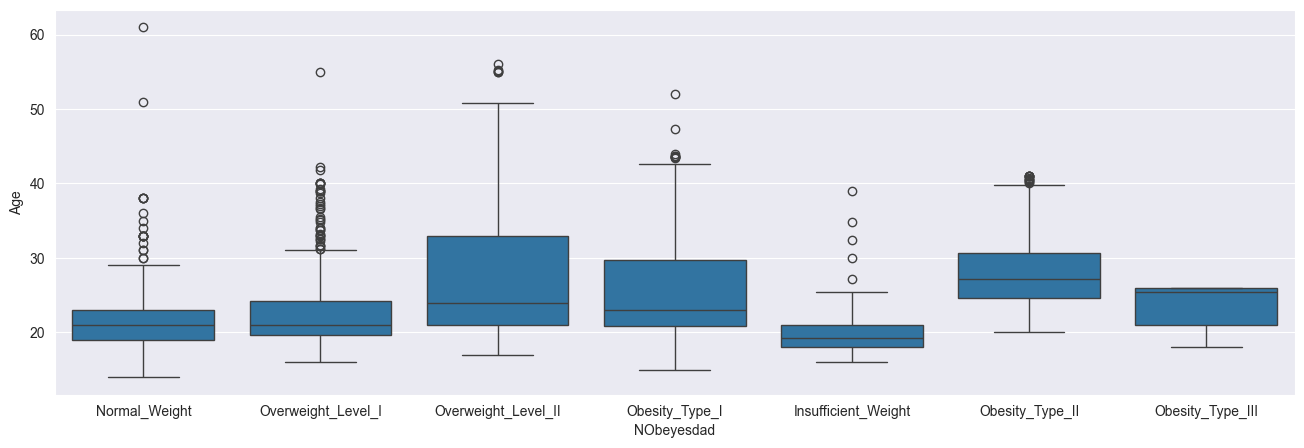

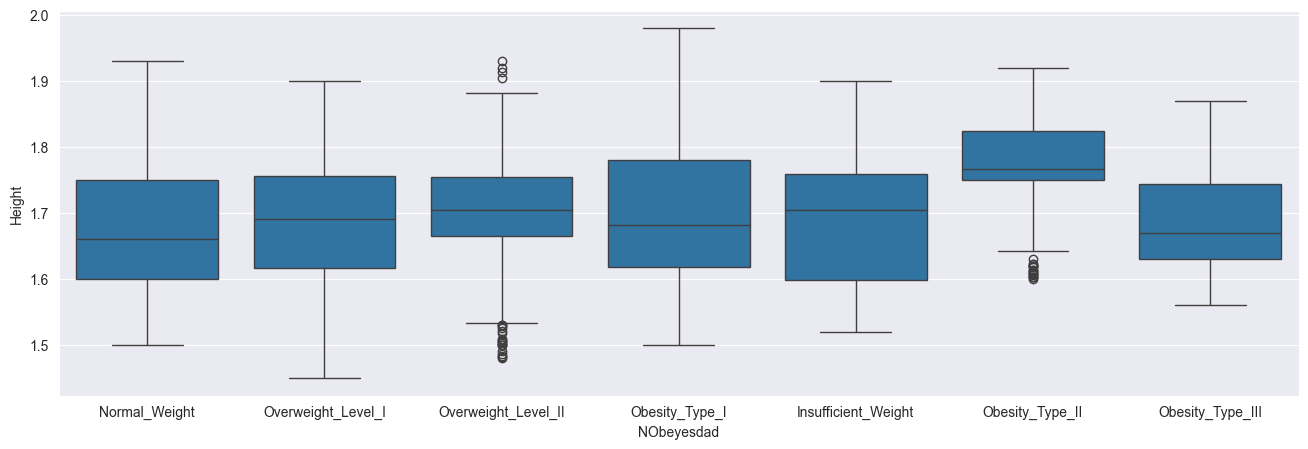

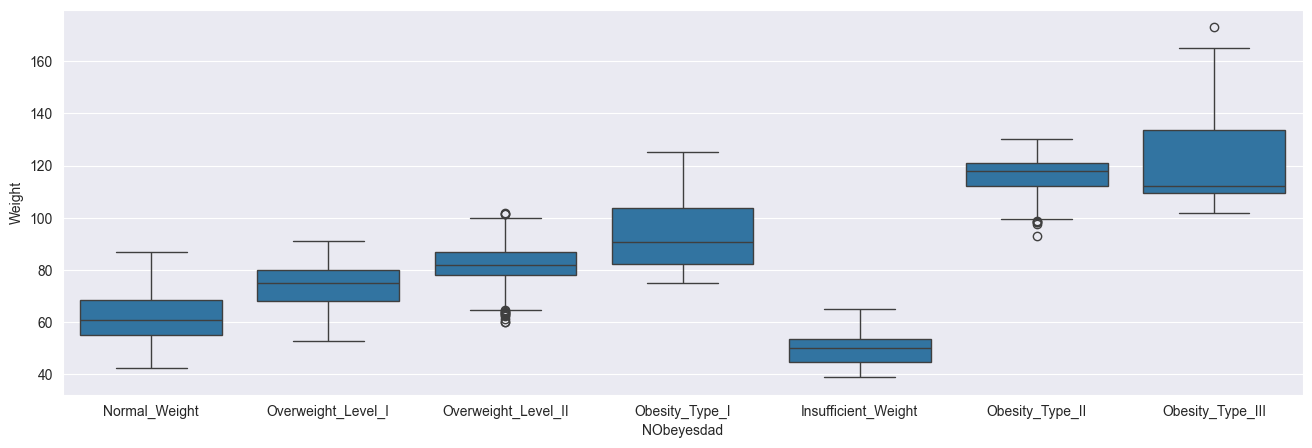

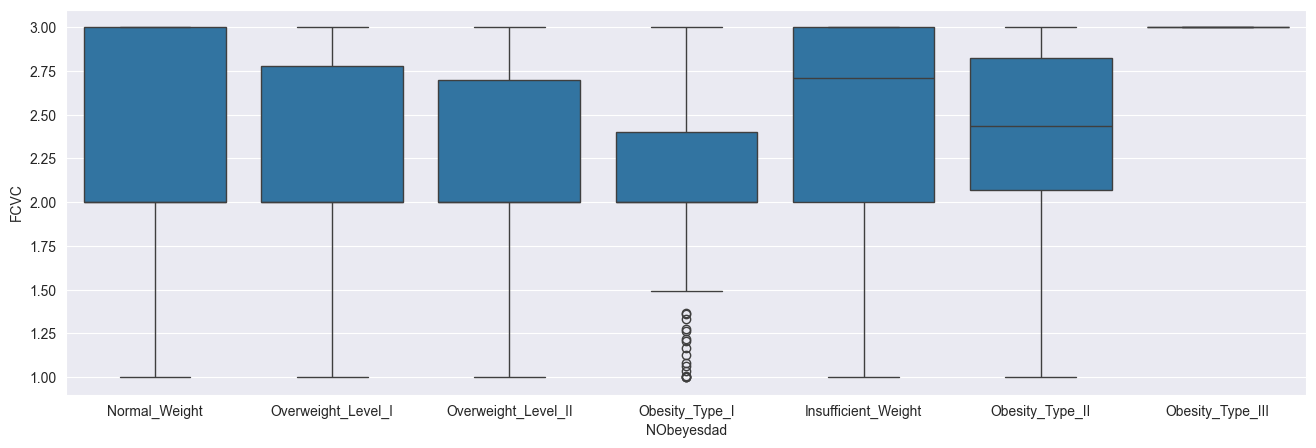

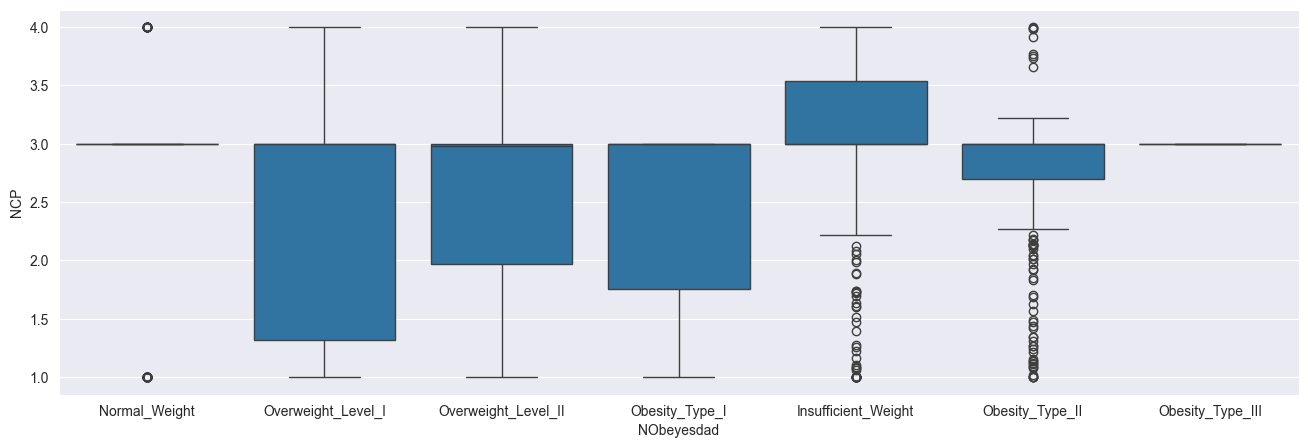

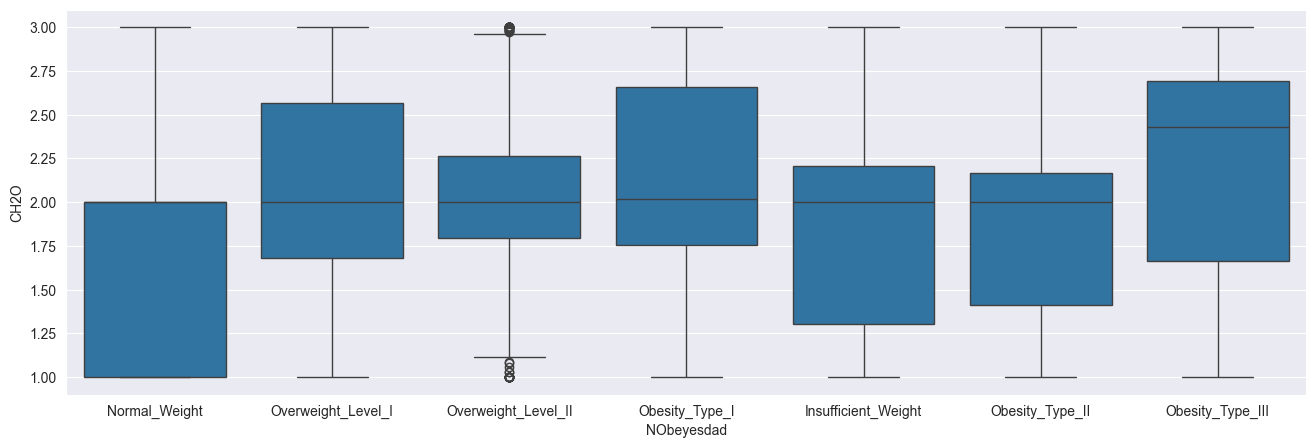

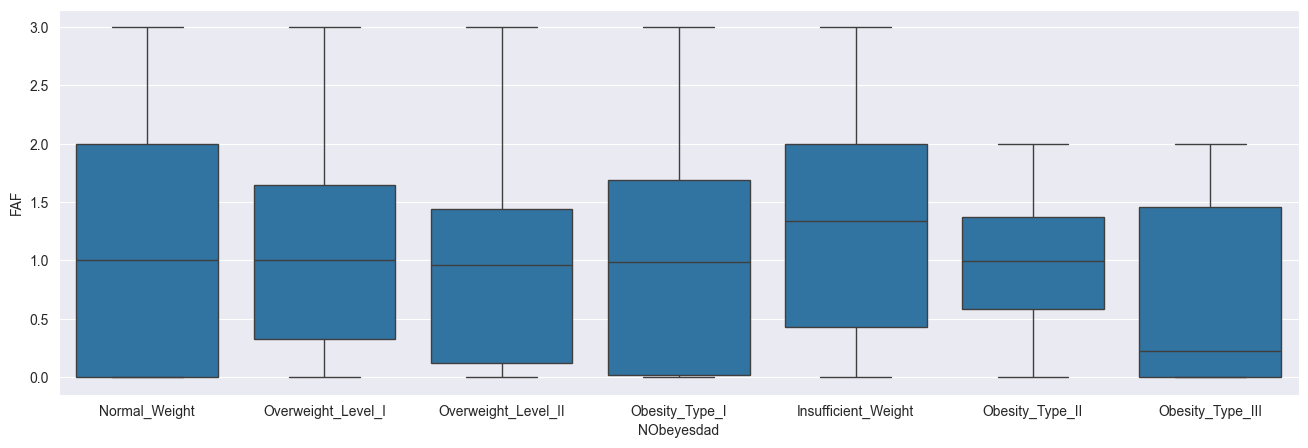

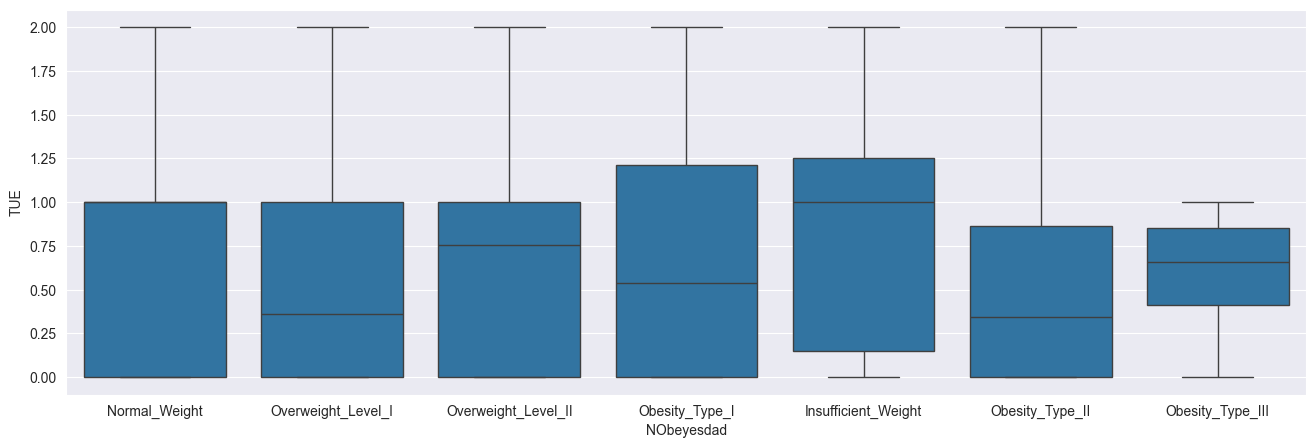

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical:
    plt.figure(figsize=(16,5))
    sns.boxplot(x='NObeyesdad',y=col,data=df)
    plt.show()

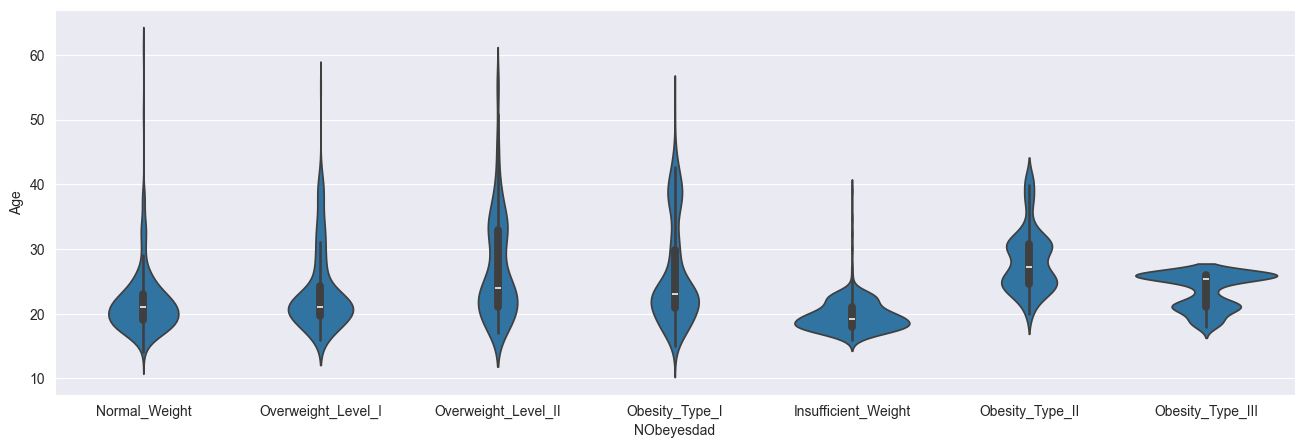

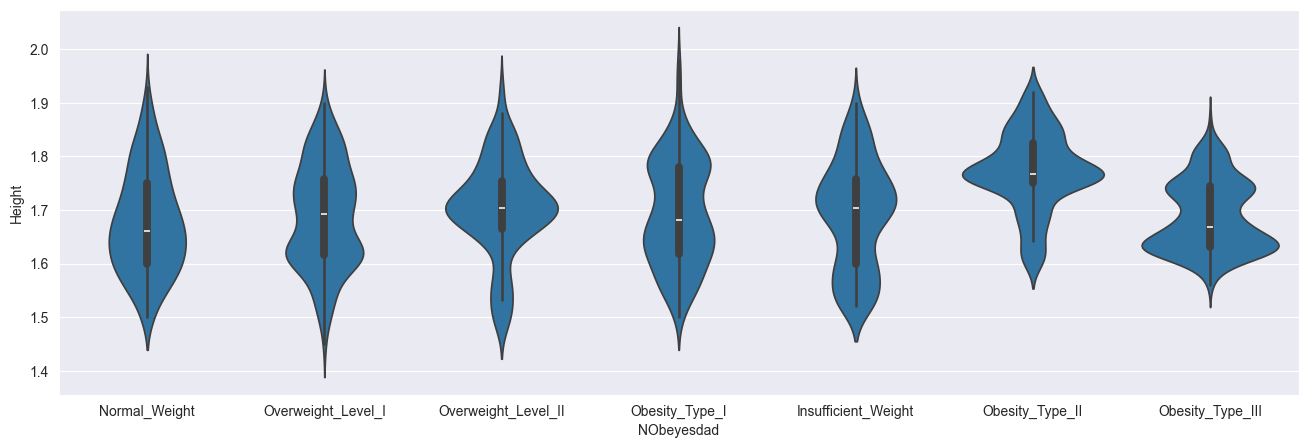

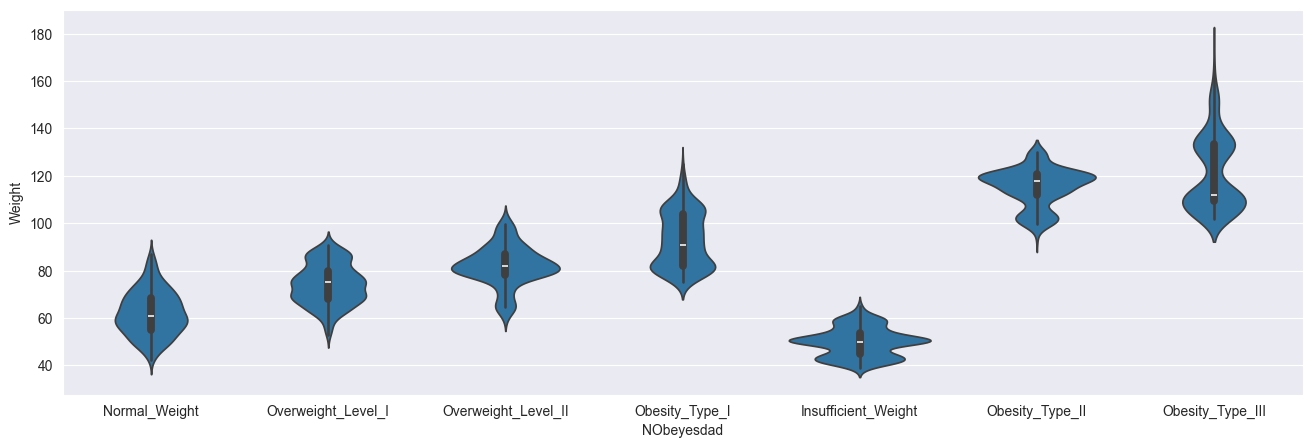

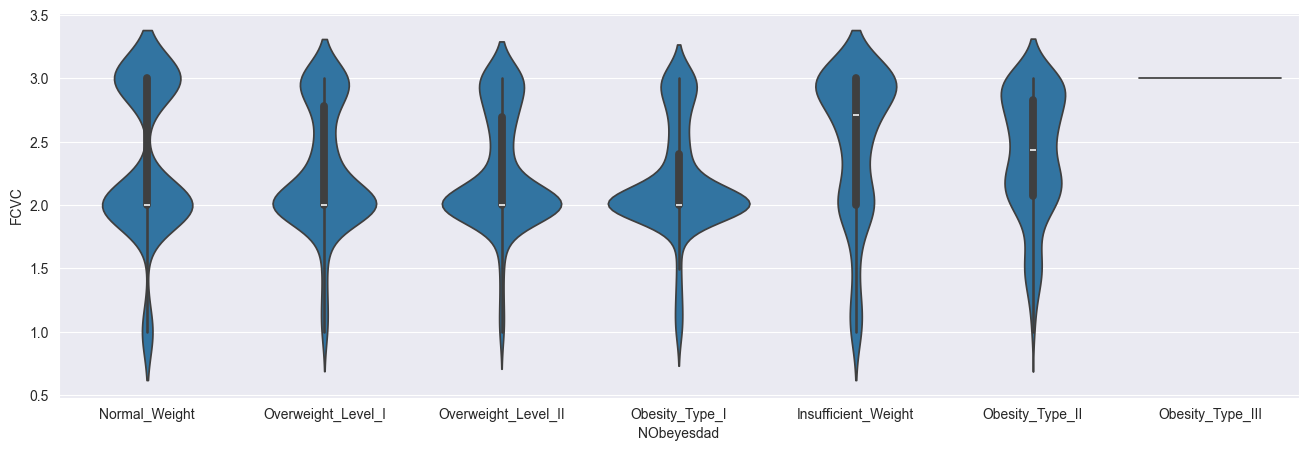

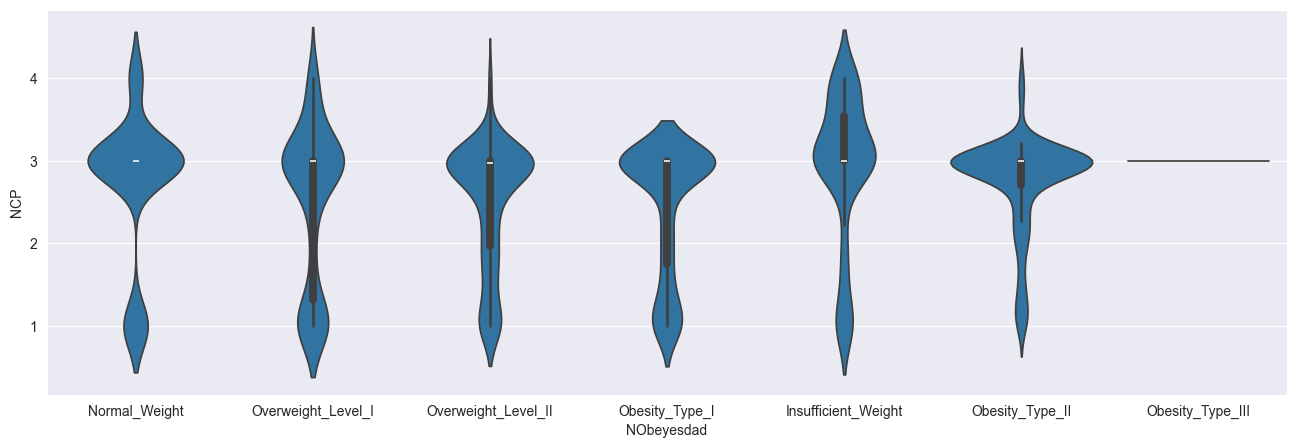

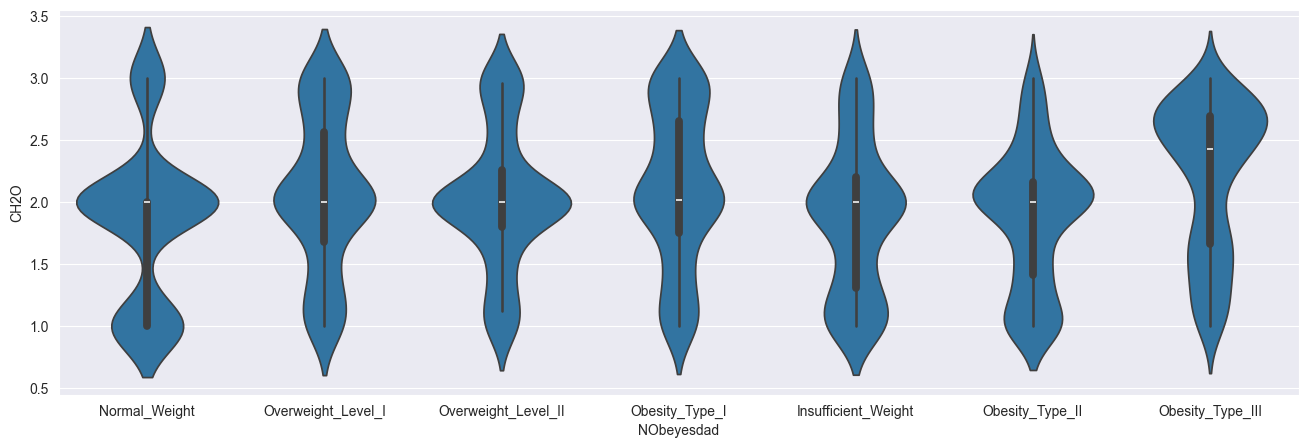

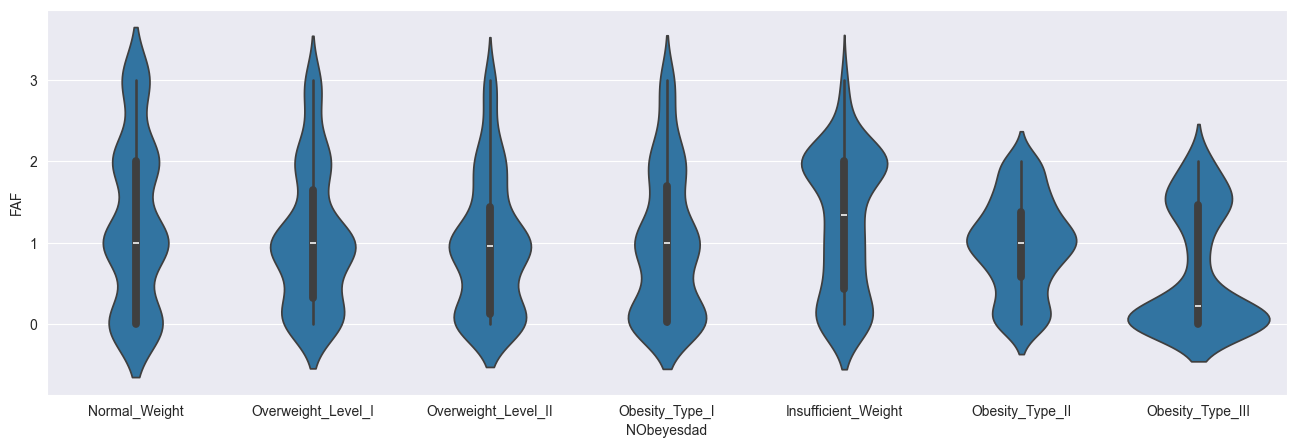

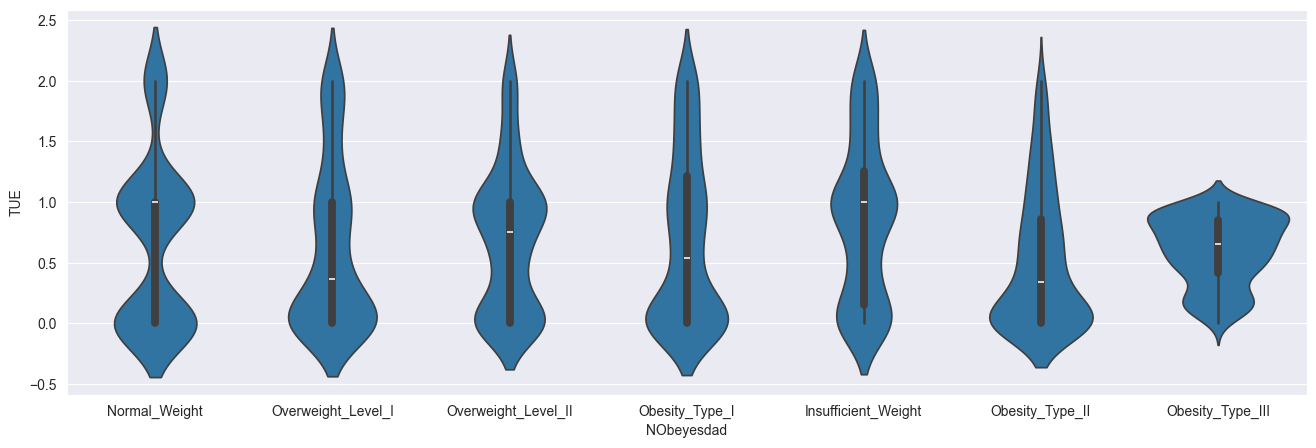

In [7]:
for col in numerical:
    plt.figure(figsize=(16,5))
    sns.violinplot(x='NObeyesdad',y=col,data=df)
    plt.show()

# na 4

In [78]:
for col in numerical:
    plt.figure(figsize=(12,4))

    sns.pointplot(x='NObeyesdad', y=col, data=df, errorbar="se", linestyles='none')

    plt.show()

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

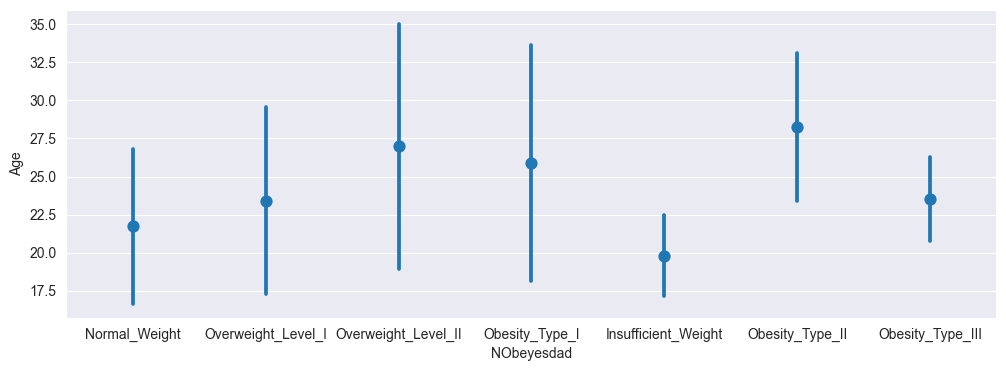

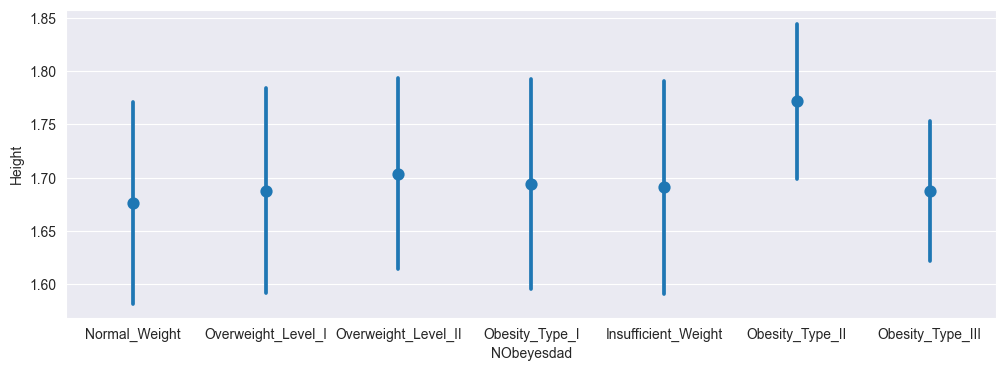

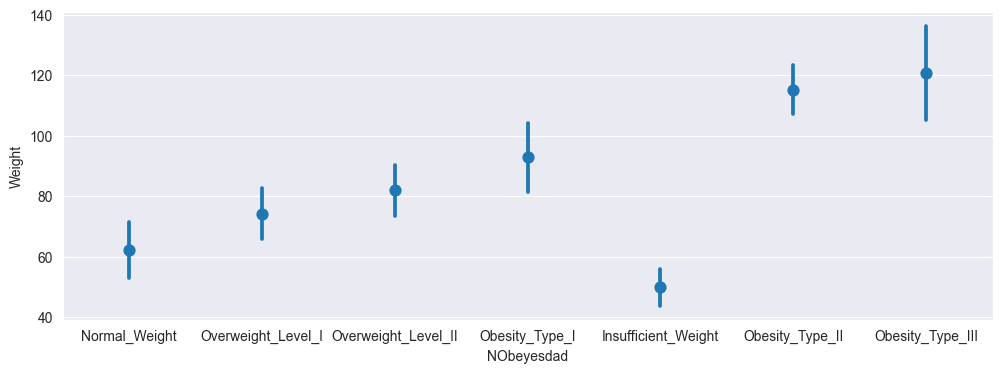

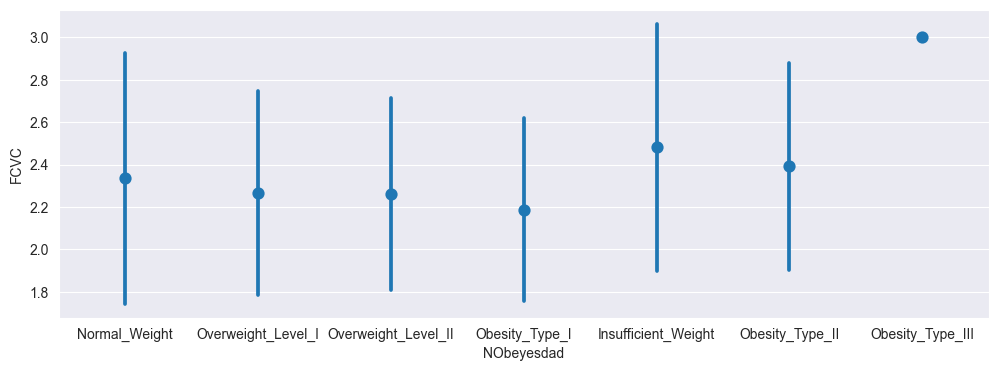

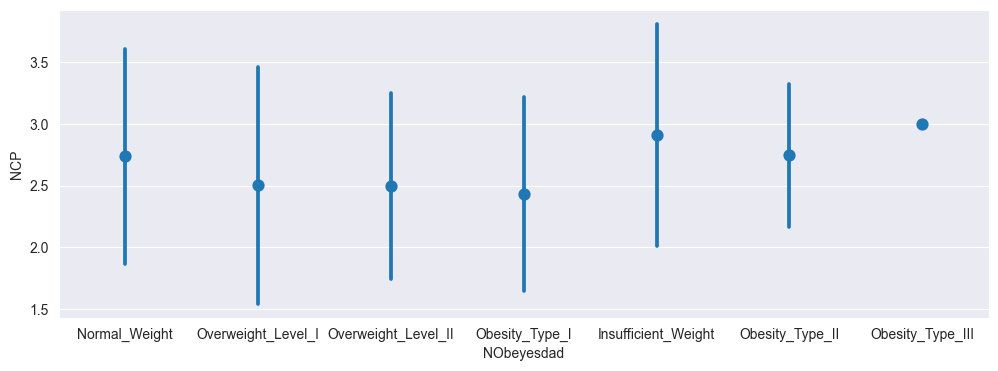

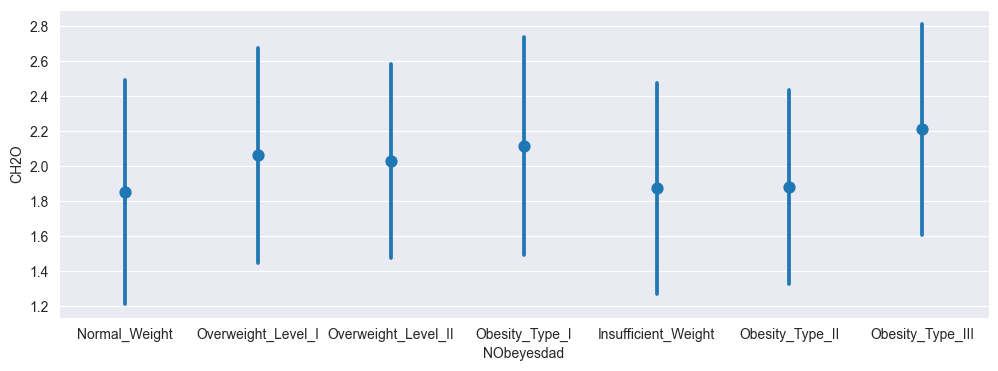

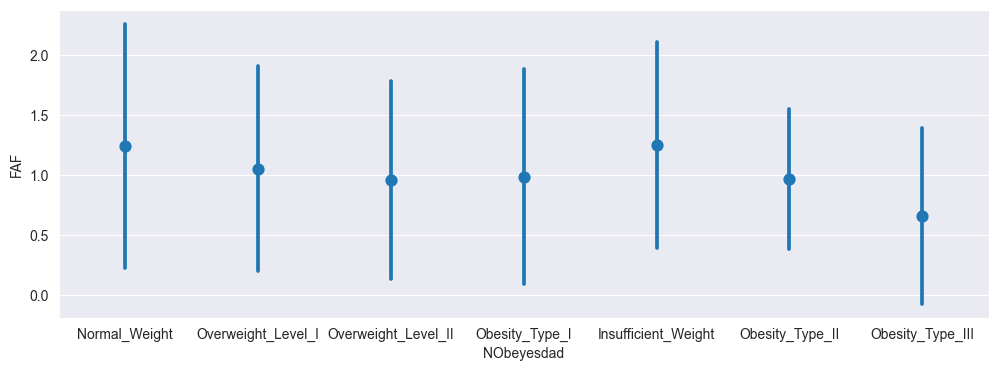

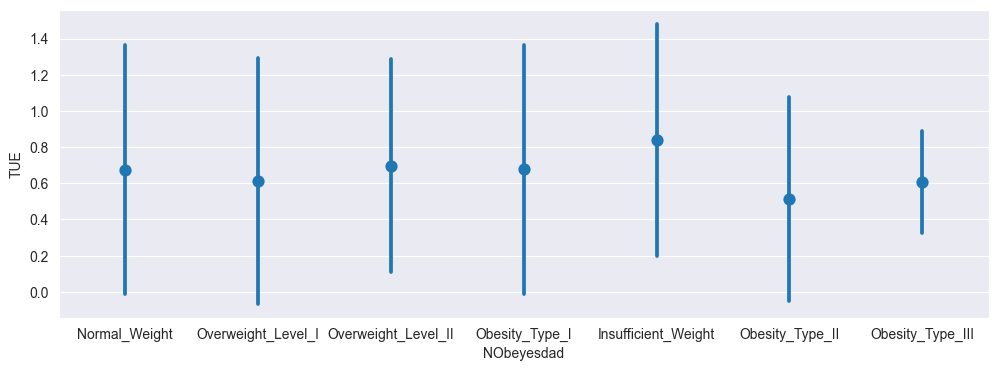

In [76]:
for col in numerical:
    plt.figure(figsize=(12,4))

    sns.pointplot(x='NObeyesdad', y=col, data=df, errorbar="sd", linestyles='none')

    plt.show()

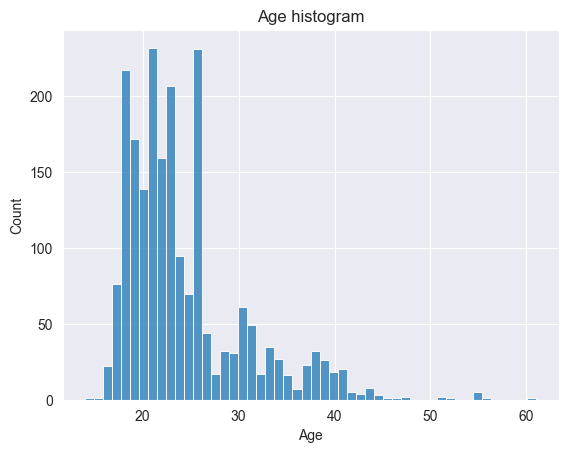

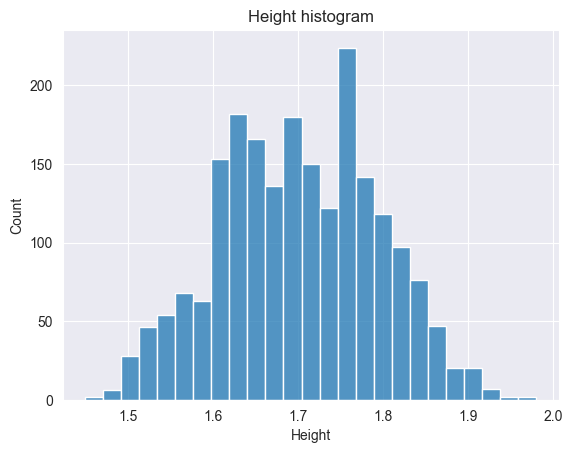

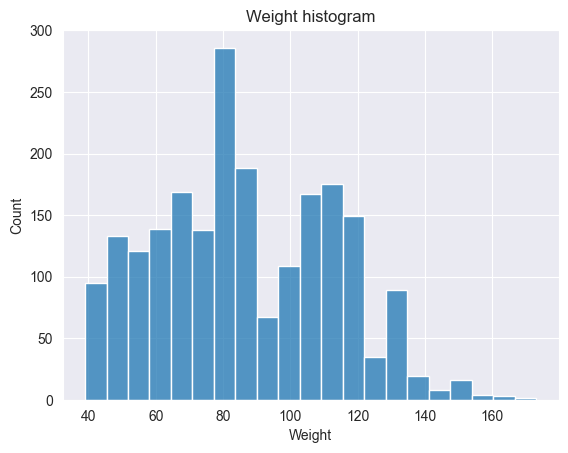

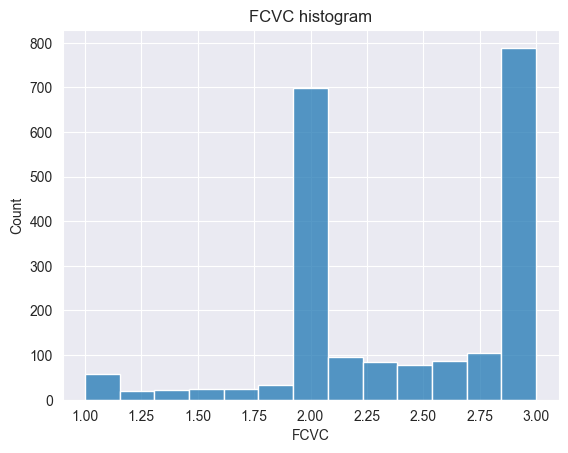

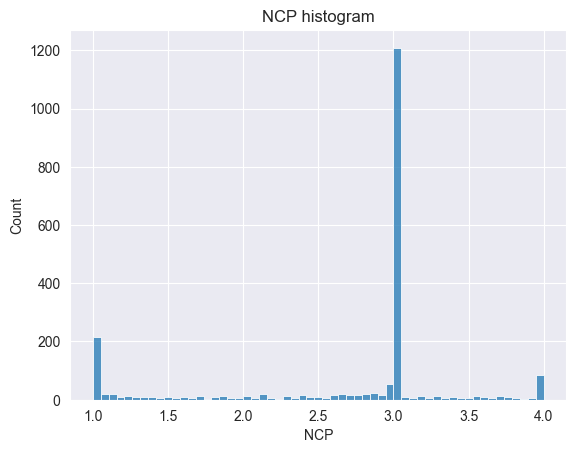

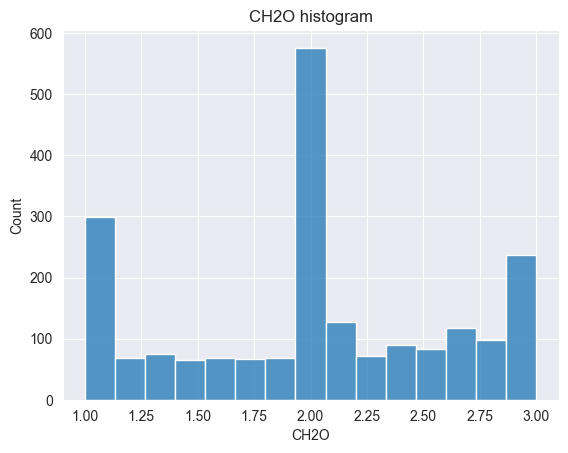

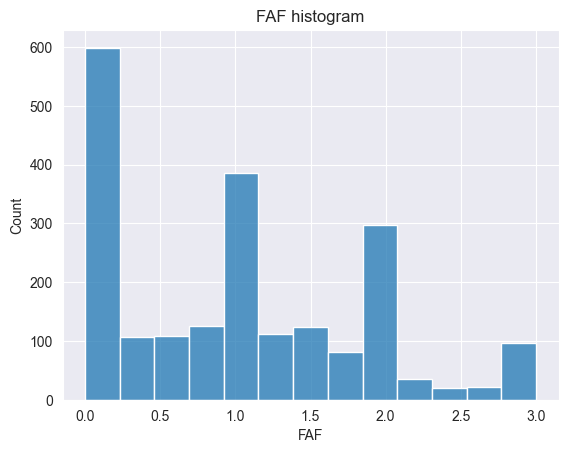

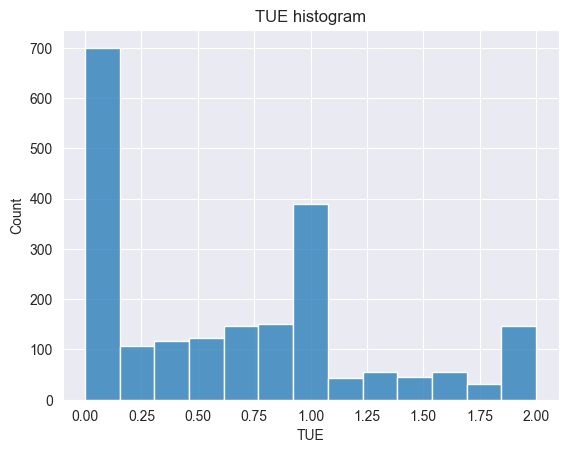

In [87]:
for col in numerical:
    sns.histplot(data=numerical, x=col)

    plt.title(f"{col} histogram")

    plt.show()

# na 4.5

<Axes: >

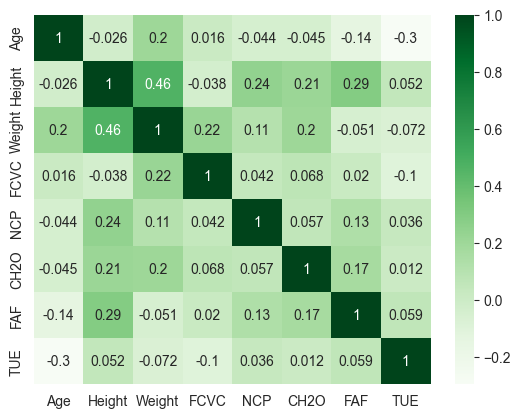

In [9]:
sns.heatmap(numerical.corr(), annot=True, cmap="Greens")